In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Exploratory data analysis

Read the database file.

In [3]:
df = pd.read_excel('Data/BBDD_Hospitalización.xlsx')
df.head()

/home/fede/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [4]:
df.shape

(570, 20)

Check columns information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [6]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


Check how many nulls values are in dataframe.

In [7]:
df.isnull().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

Print the content of each column.

In [8]:
columns = df.columns.to_list()
columns.pop(0)
columns

for column in columns:
    print(f'{column} = \n {df[column].value_counts()}')
    print('\n')

DIABETES = 
 NO    505
SI     63
Name: DIABETES, dtype: int64


HOSPITALIZACIÓN ULTIMO MES = 
 NO    563
SI      5
Name: HOSPITALIZACIÓN ULTIMO MES, dtype: int64


PSA = 
 6.00     31
7.00     27
5.00     20
8.00     19
10.00    15
         ..
10.20     1
2.40      1
5.02      1
9.50      1
4.43      1
Name: PSA, Length: 146, dtype: int64


BIOPSIAS PREVIAS = 
 NO    510
SI     56
Name: BIOPSIAS PREVIAS, dtype: int64


VOLUMEN PROSTATICO = 
 SI    408
NO    159
Name: VOLUMEN PROSTATICO, dtype: int64


ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS = 
 FLUOROQUINOLONA_AMINOGLICOSIDO    448
CEFALOSPORINA_AMINOGLUCOCIDO       56
OTROS                              42
OROQUINOLONAS                      18
FLUOROQUINOLONA_AMINOGLICÓSIDO      4
Name: ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS, dtype: int64


NUMERO DE MUESTRAS TOMADAS = 
 12.0    432
24.0     42
18.0     36
6.0      26
10.0     10
4.0       6
16.0      4
20.0      4
8.0       2
15.0      2
22.0      2
14.0      2
Name: NUMERO DE MUESTR

# Data preparation

Replace string of numeric column.

In [9]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0, inplace=True)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()

0.0    542
2.0      9
3.0      8
1.0      5
5.0      2
9.0      2
Name: NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA, dtype: int64

Delete wrong characters

In [10]:
for column in columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()

Delete row if all the fields are `NaN`, otherwise not.

In [11]:
df.dropna(how='all', inplace=True)

Check how many nulls values are in dataframe.

In [12]:
df.isnull().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

In [13]:
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO', inplace=True)


Check for outlier in column `EDAD`.

In [14]:
df_aux = df[df['EDAD'] > 100]
df_aux

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
161,143.0,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
181,151.0,NO,NO,5.7,NO,SI,OTROS,12.0,NO,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0


In [15]:
df_aux = df[df['EDAD'] < 0]
df_aux

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC


Delete row which contains wrong information

In [16]:
df.drop([161, 181], inplace=True)


Check for duplicates and delete them.

In [17]:
df.duplicated().sum()

108

In [18]:
df[df.duplicated()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
42,62.0,NO,NO,16.0,NO,SI,OROQUINOLONAS,12.0,NO,SI,ADENOCARCINOMA GLEASON 8,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
43,69.0,NO,NO,17.0,SI,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
45,66.0,NO,NO,6.4,NO,SI,OTROS,12.0,NO,SI,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
49,68.0,NO,NO,20.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,SI,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,66.0,NO,NO,18.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
555,67.0,NO,NO,8.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
557,59.0,NO,NO,16.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
560,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0


In [19]:
df.drop_duplicates()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1.0,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1.0,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1.0,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1.0,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1.0,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,0.0,NO,NO,NO,NaN,NO,NO,0.0,0.0


In [20]:
df.isnull().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

Fill missing values with median.

In [21]:
df['PSA'].fillna(value=df['PSA'].median(), inplace=True)

Delete missing values.

In [22]:
df.dropna(axis=0, inplace=True)

Reset indexes.

In [23]:
df.reset_index(drop=True)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1.0,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1.0,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1.0,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1.0,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1.0,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
539,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
540,78.0,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
541,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0


Change columns names.

In [24]:
columns_name_list = df.columns.to_list()
columns_name_list
columns_name_dict = {column:index for index,column in enumerate(columns_name_list)}
columns_name_dict

{'EDAD': 0,
 'DIABETES': 1,
 'HOSPITALIZACIÓN ULTIMO MES': 2,
 'PSA': 3,
 'BIOPSIAS PREVIAS': 4,
 'VOLUMEN PROSTATICO': 5,
 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 6,
 'NUMERO DE MUESTRAS TOMADAS': 7,
 'CUP': 8,
 'ENF. CRONICA PULMONAR OBSTRUCTIVA': 9,
 'BIOPSIA': 10,
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 11,
 'FIEBRE': 12,
 'ITU': 13,
 'TIPO DE CULTIVO': 14,
 'AGENTE AISLADO': 15,
 'PATRON DE RESISTENCIA': 16,
 'HOSPITALIZACION': 17,
 'DIAS HOSPITALIZACION MQ': 18,
 'DIAS HOSPITALIZACIÓN UPC': 19}

In [25]:
columns_name_dict = {'EDAD': 'edad',
                    'DIABETES': 'diabetes',
                    'HOSPITALIZACIÓN ULTIMO MES': 'hum',
                    'PSA': 'psa',
                    'BIOPSIAS PREVIAS': 'bp',
                    'VOLUMEN PROSTATICO': 'vp',
                    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'aup',
                    'NUMERO DE MUESTRAS TOMADAS': 'nmt',
                    'CUP': 'cup',
                    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'ecpo',
                    'BIOPSIA': 'biopsia',
                    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'ndpb_pci',
                    'FIEBRE': 'fiebre',
                    'ITU': 'itu',
                    'TIPO DE CULTIVO': 'tipo_cultivo',
                    'AGENTE AISLADO': 'agente_aislado',
                    'PATRON DE RESISTENCIA': 'patron_resistencia',
                    'HOSPITALIZACION': 'hospitalizacion',
                    'DIAS HOSPITALIZACION MQ': 'dias_hosp_mq',
                    'DIAS HOSPITALIZACIÓN UPC': 'dias_hosp_upc'}
df.rename(columns=columns_name_dict, inplace=True)

Check columns values again.

In [26]:
columns = df.columns.to_list()
columns.pop(0)
columns

for column in columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()
    print(f'{column} = \n {df[column].value_counts()}')
    print('\n')

diabetes = 
 NO    481
SI     62
Name: diabetes, dtype: int64


hum = 
 NO    538
SI      5
Name: hum, dtype: int64


psa = 
 6.00     31
7.00     26
8.00     21
5.00     20
10.00    15
         ..
91.80     1
3.70      1
2.40      1
5.02      1
75.00     1
Name: psa, Length: 145, dtype: int64


bp = 
 NO    490
SI     53
Name: bp, dtype: int64


vp = 
 SI    390
NO    153
Name: vp, dtype: int64


aup = 
 FLUOROQUINOLONA_AMINOGLICOSIDO    431
CEFALOSPORINA_AMINOGLUCOCIDO       55
OTROS                              40
OROQUINOLONAS                      17
Name: aup, dtype: int64


nmt = 
 12.0    410
24.0     41
18.0     36
6.0      26
10.0     10
4.0       6
16.0      4
8.0       2
15.0      2
22.0      2
14.0      2
20.0      2
Name: nmt, dtype: int64


cup = 
 NO    539
SI      4
Name: cup, dtype: int64


ecpo = 
 NO          525
SI           12
SI, EPOC      3
SI, ASMA      3
Name: ecpo, dtype: int64


biopsia = 
 NEG                                           304
ADENOCARCINOMA GLEA

Change SI/NO values for 1/0

In [27]:
yes_no_list_column = {'SI':1, 'NO':0}
dict_si_no = ['diabetes', 'hum', 'bp', 'vp', 'cup', 'fiebre', 'itu', 'hospitalizacion']
for column in dict_si_no:
    df.replace({column: yes_no_list_column}, inplace=True)
df.head()

,edad,diabetes,hum,psa,bp,vp,aup,nmt,cup,ecpo,biopsia,ndpb_pci,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NO,NEG,1.0,1,0,NO,NO,NO,1,2.0,0.0
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NO,NEG,1.0,1,0,NO,NO,NO,1,5.0,0.0
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,NO,NEG,1.0,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NO,NEG,1.0,1,0,NO,NO,NO,1,5.0,0.0
4,55.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,NO,NEG,1.0,1,0,HEMOCULTIVO,E.COLI,NO,1,4.0,3.0


Check dataframe columns types.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 564
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                543 non-null    float64
 1   diabetes            543 non-null    int64  
 2   hum                 543 non-null    int64  
 3   psa                 543 non-null    float64
 4   bp                  543 non-null    int64  
 5   vp                  543 non-null    int64  
 6   aup                 543 non-null    object 
 7   nmt                 543 non-null    float64
 8   cup                 543 non-null    int64  
 9   ecpo                543 non-null    object 
 10  biopsia             543 non-null    object 
 11  ndpb_pci            543 non-null    float64
 12  fiebre              543 non-null    int64  
 13  itu                 543 non-null    int64  
 14  tipo_cultivo        543 non-null    object 
 15  agente_aislado      543 non-null    object 
 16  patron_r

Replace qualitative values for quantitative ones.

In [29]:
def replace_function(dataframe, column):
    """Replace qualitative values for quantitative ones.

    Args:
        dataframe (DataFrame): Dataframe.
        column (str): Column name
    """
    var_name = dataframe[column].unique().tolist()
    var_name_dict = {var:index for index, var in enumerate(var_name)}
    dataframe.replace({column: var_name_dict}, inplace=True)
    print(column)
    print(var_name_dict)

In [30]:
replace_function(df, 'biopsia')
replace_function(df, 'ecpo')
replace_function(df, 'tipo_cultivo')
replace_function(df, 'agente_aislado')
replace_function(df, 'patron_resistencia')
replace_function(df, 'aup')
df.head()

biopsia
{'NEG': 0, 'ADENOCARCINOMA GLEASON 6': 1, 'ADENOCARCINOMA GLEASON 7': 2, 'ADENOCARCINOMA GLEASON 10': 3, 'ADENOCARCINOMA GLEASON 9': 4, 'ADENOCARCINOMA GLEASON 8': 5, 'PROSTATITIS': 6, 'HIPERPLASIA PROSTATICA': 7, 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS': 8}
ecpo
{'NO': 0, 'SI, EPOC': 1, 'SI, ASMA': 2, 'SI': 3}
tipo_cultivo
{'NO': 0, 'HEMOCULTIVO': 1, 'UROCULTIVO': 2, 'HEMOCULTIVO Y UROCULTIVO': 3}
agente_aislado
{'NO': 0, 'E.COLI': 1, 'PSEUDOMONAS AERUGINOSA': 2}
patron_resistencia
{'NO': 0, 'AMPI R, CIPRO R, GENTA R, SULFA M R': 1, 'RESISTENTE A AMPI, CIPRO Y GENTA': 2, 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA': 3, 'MULTI SENSIBLE': 4}
aup
{'FLUOROQUINOLONA_AMINOGLICOSIDO': 0, 'CEFALOSPORINA_AMINOGLUCOCIDO': 1, 'OROQUINOLONAS': 2, 'OTROS': 3}


,edad,diabetes,hum,psa,bp,vp,aup,nmt,cup,ecpo,biopsia,ndpb_pci,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53.0,0,0,4.0,0,1,0,12.0,0,0,0,1.0,1,0,0,0,0,1,2.0,0.0
1,56.0,0,0,7.7,0,1,0,12.0,0,0,0,1.0,1,0,0,0,0,1,5.0,0.0
2,57.0,0,0,29.0,1,1,0,24.0,0,0,0,1.0,1,0,1,1,1,1,4.0,3.0
3,56.0,0,0,7.0,0,1,0,12.0,0,0,0,1.0,1,0,0,0,0,1,5.0,0.0
4,55.0,0,0,29.0,1,1,0,24.0,0,0,0,1.0,1,0,1,1,0,1,4.0,3.0


# Modeling and evaluation

In [31]:
# columns = df.columns.to_list()
columns = ['diabetes', 'psa', 'bp', 'vp', 'aup', 'nmt', 'biopsia', 'fiebre', 'hospitalizacion', 'dias_hosp_mq']

Heat map to check correlation variables

In [32]:
df_aux = df[columns]
df_aux.head()

,diabetes,psa,bp,vp,aup,nmt,biopsia,fiebre,hospitalizacion,dias_hosp_mq
0,0,4.0,0,1,0,12.0,0,1,1,2.0
1,0,7.7,0,1,0,12.0,0,1,1,5.0
2,0,29.0,1,1,0,24.0,0,1,1,4.0
3,0,7.0,0,1,0,12.0,0,1,1,5.0
4,0,29.0,1,1,0,24.0,0,1,1,4.0


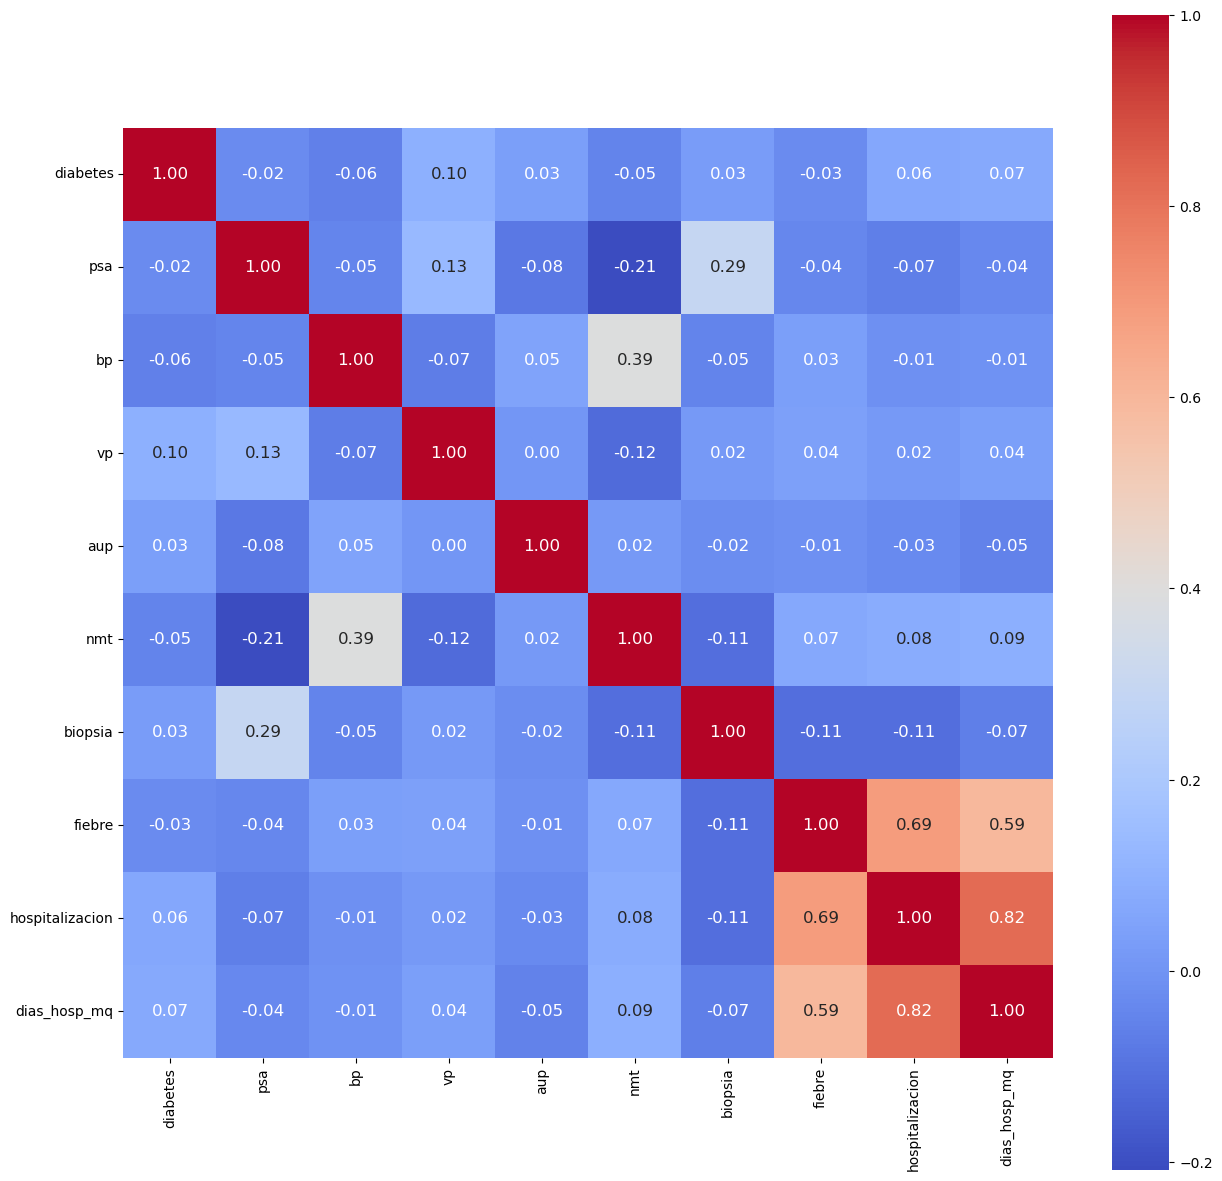

In [33]:
df_aux = df[columns]
corr = df_aux.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12},
            xticklabels= df_aux.columns, 
            yticklabels= df_aux.columns,
            cmap= 'coolwarm')
plt.show()

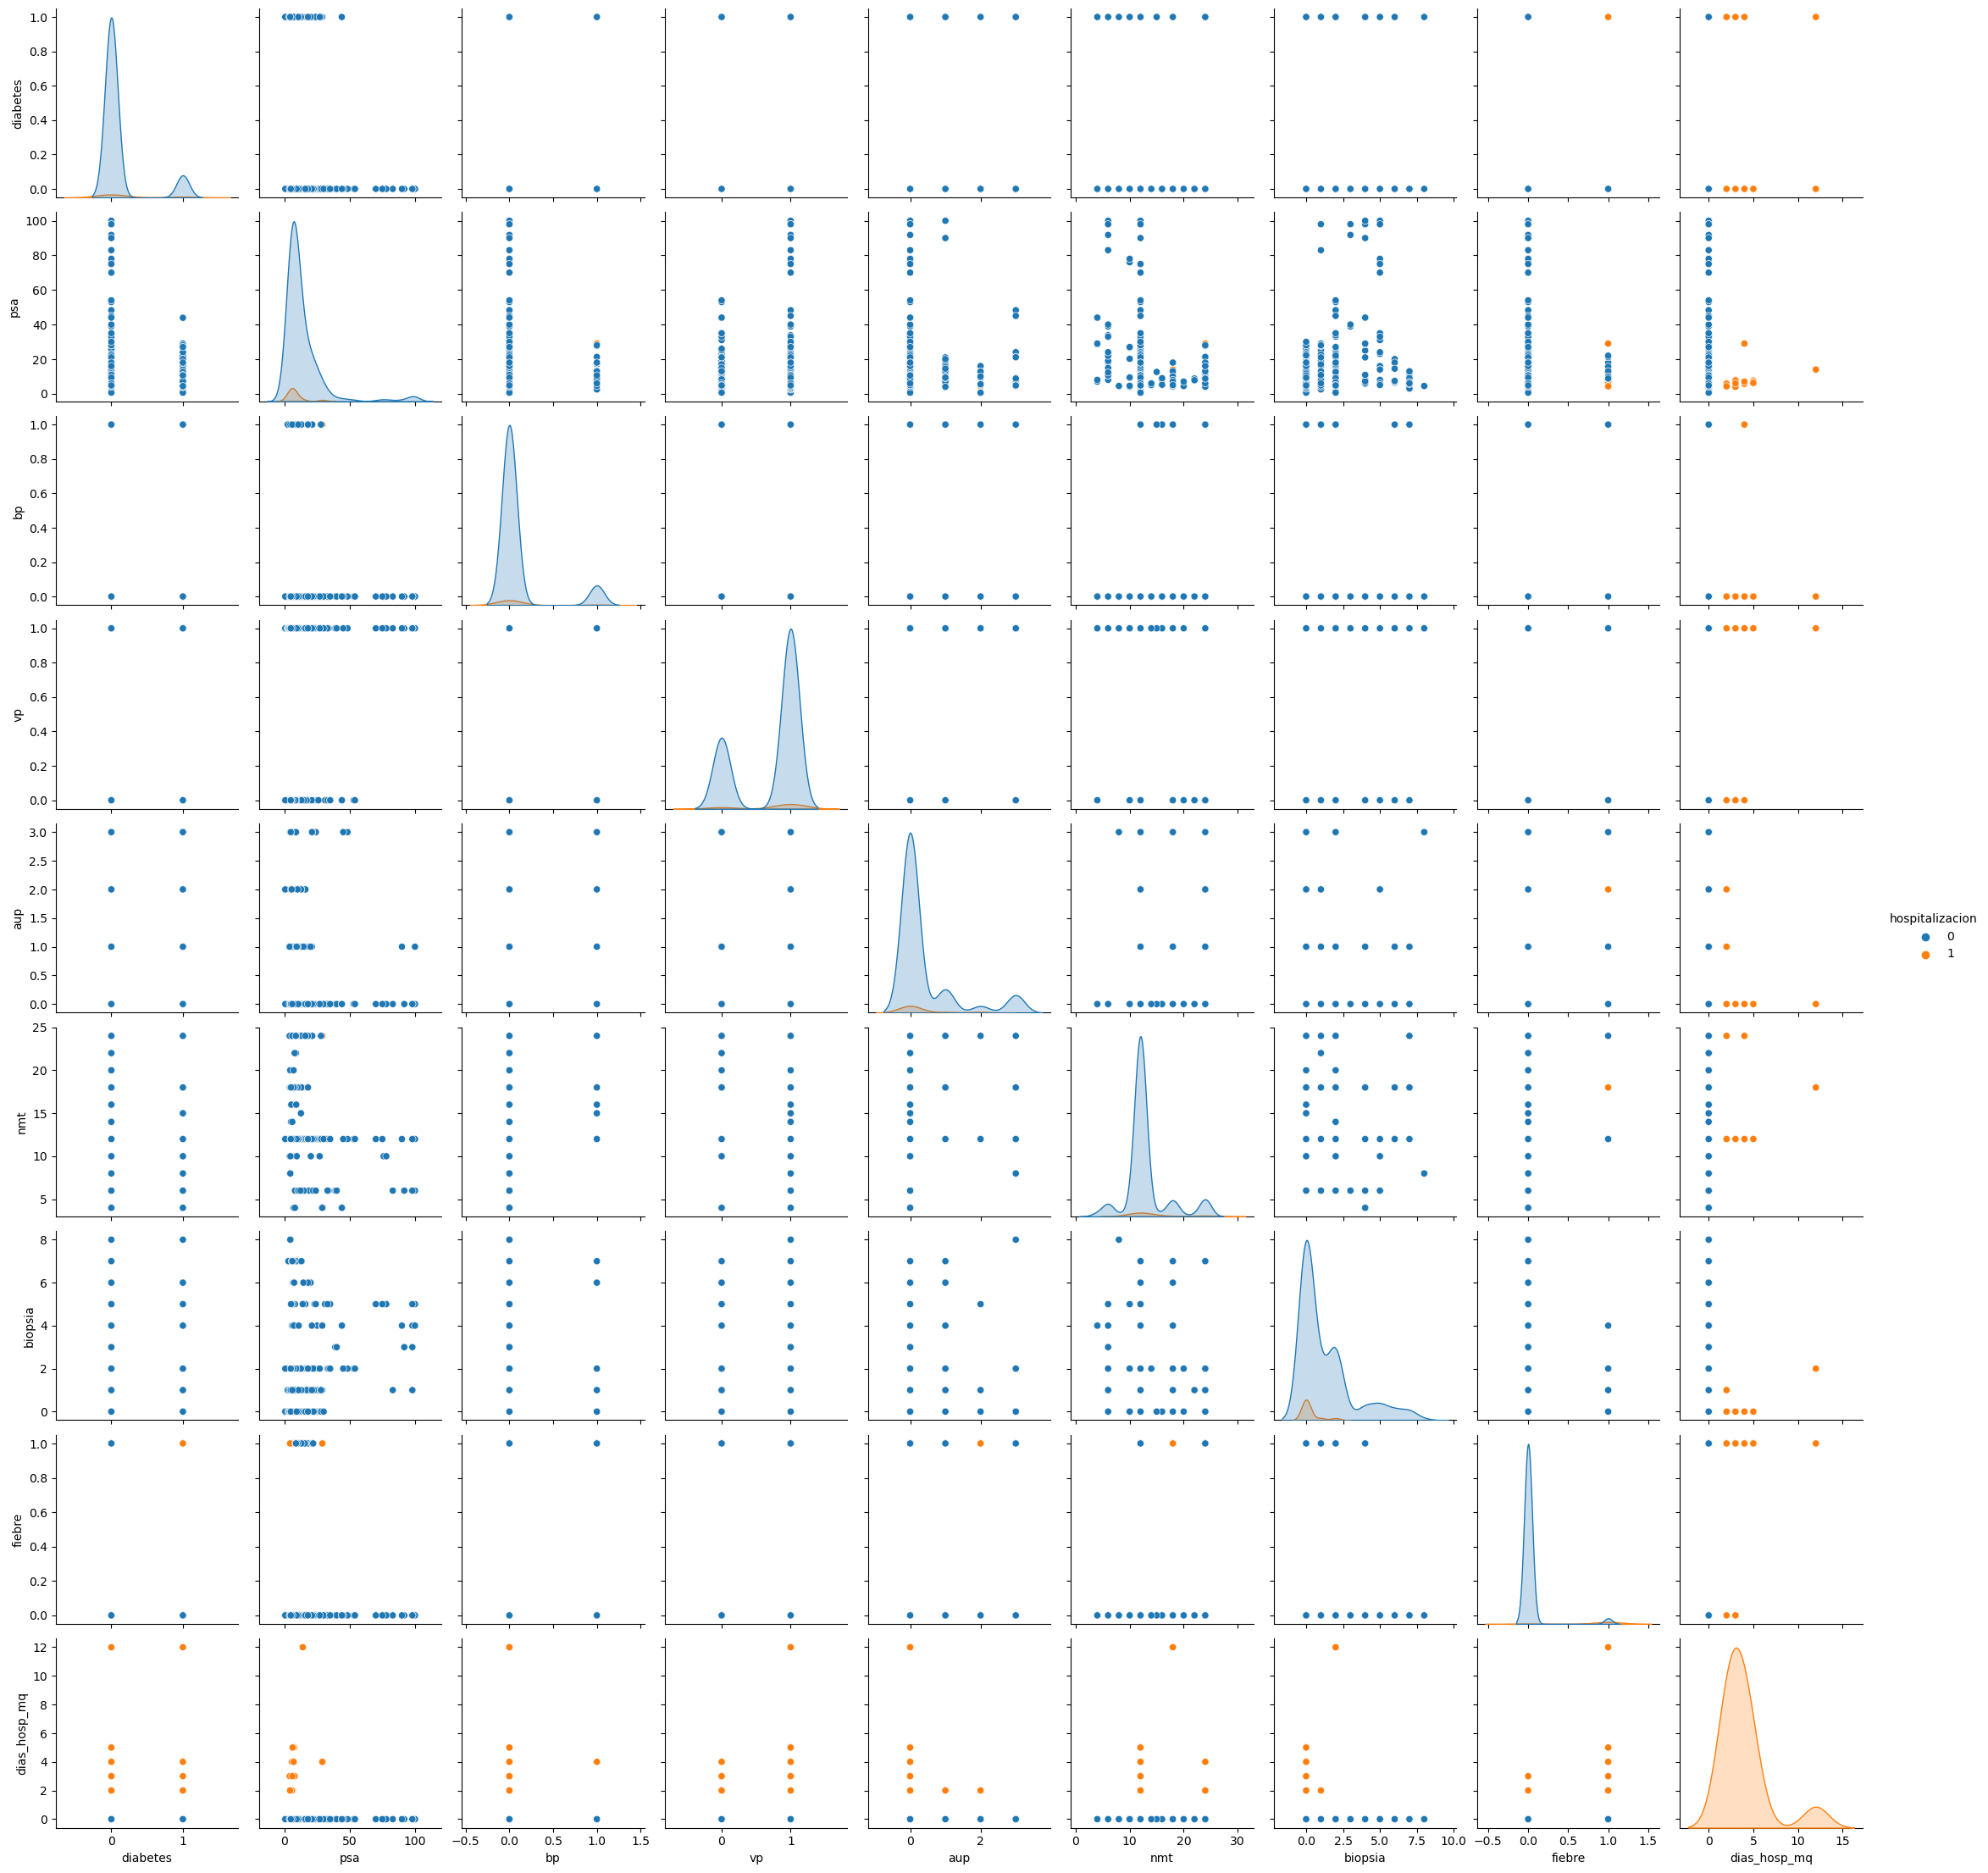

In [34]:
sb.pairplot(df_aux, hue = 'hospitalizacion')
plt.show()

## Check `hospitalizacion` balance

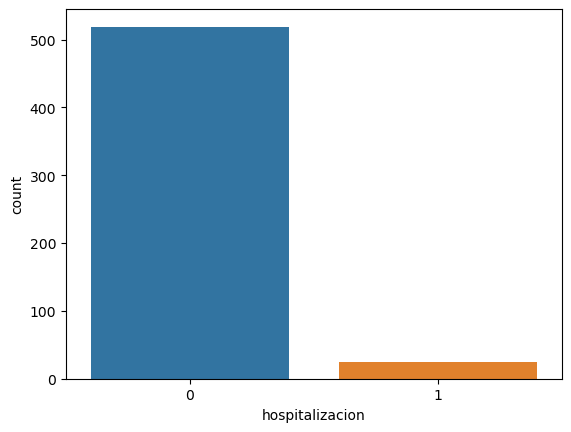

In [64]:
sb.countplot(x='hospitalizacion', data=df_aux)
plt.show()

In [35]:
df_aux.describe()

,diabetes,psa,bp,vp,aup,nmt,biopsia,fiebre,hospitalizacion,dias_hosp_mq
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,0.114180,13.377845,0.097606,0.718232,0.384899,12.990792,1.237569,0.068140,0.044199,0.173112
std,0.318324,15.917813,0.297055,0.450276,0.861814,3.954761,1.863593,0.252218,0.205726,0.979238
min,0.000000,0.600000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.600000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,15.000000,0.000000,1.000000,0.000000,12.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,100.000000,1.000000,1.000000,3.000000,24.000000,8.000000,1.000000,1.000000,12.000000


In [36]:
columns_list = df_aux.columns.to_list()
columns_list.remove('hospitalizacion')
y = df['hospitalizacion'].values

In [ ]:
for column in columns_list:
    sb.scatterplot(df_aux[column].values, y)
    plt.show()


# KNeighborsClassifier Model

In [38]:
columns = ['edad', 'diabetes', 'psa', 'biopsia', 'fiebre',  'dias_hosp_mq']
X = df[columns].values

In [39]:
y = df['hospitalizacion'].values

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Scale values

In [41]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

## Oversampling values

In [42]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
len(y_over)

1038

In [43]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=10, stratify=y_over)

In [44]:
model_knn = GridSearchCV(knn, param_grid=param_grid, cv=5)
model_knn.fit(X_train, y_train)

/home/fede/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/fede/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [45]:
print(f'Best hiperparameters: {str(model_knn.best_params_)}')
print(f'Best score: {model_knn.best_score_}')

Best hiperparameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
Best score: 1.0


In [46]:
y_pred_test = model_knn.predict(X_test)
y_pred_train = model_knn.predict(X_train)

/home/fede/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/fede/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

# Confision matrix

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[130,   0],
       [  0, 130]])

In [48]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[389,   0],
       [  0, 389]])

In [49]:
print(f'Accuracy test: {accuracy_score(y_test, y_pred_test)}')
print(f'Accuracy train: {accuracy_score(y_train, y_pred_train)}')

Accuracy test: 1.0
Accuracy train: 1.0


## Classification report 

In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       130

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [51]:
report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778



## Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
knn_scores = cross_val_score(knn, X_over, y_over, cv=5)
print(knn_scores)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

[1.         1.         0.99519231 1.         1.        ]
KNN Accuracy: 1.00 (+/- 0.00)


/home/fede/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/fede/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

# DecisionTreeClassifier Model

In [54]:
param_grid = { 'max_depth': [2,4,6,8,10,12],
                'random_state': [42],
                'criterion': ['gini', 'entropy']
              }
clf_tree = DecisionTreeClassifier()
model_tree = GridSearchCV(clf_tree, param_grid=param_grid, cv=5)
model_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'random_state': [42]})

In [55]:
print(f'Best hiperparameters: {str(model_tree.best_params_)}')
print(f'Best score: {model_tree.best_score_}')

Best hiperparameters: {'criterion': 'gini', 'max_depth': 2, 'random_state': 42}
Best score: 1.0


In [56]:
y_pred_test = model_tree.predict(X_test)
y_pred_train = model_tree.predict(X_train)

# Confision matrix

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[130,   0],
       [  0, 130]])

In [58]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[389,   0],
       [  0, 389]])

In [59]:
print(f'Accuracy test: {accuracy_score(y_test, y_pred_test)}')
print(f'Accuracy train: {accuracy_score(y_train, y_pred_train)}')

Accuracy test: 1.0
Accuracy train: 1.0


## Classification report 

In [60]:
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       130

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [61]:
report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778



## Cross Validation

In [62]:
tree_scores = cross_val_score(clf_tree, X_over, y_over, cv=5)
# print(tree_scores)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))

KNN Accuracy: 1.00 (+/- 0.00)


### Cross validation comparing between two models

In [63]:
print(tree_scores)
print(knn_scores)

[1. 1. 1. 1. 1.]
[1.         1.         0.99519231 1.         1.        ]
